# Select and superposition anode waveforms 

In [ ]:
import analysis_data
def calculate_wf_data_array(file_list, Channel='Anode'):
    # time_delay_map = {'5us':5, '200us':200, '1ms':1000, '10ms':10000}  ## time delay unit on 'us'
    led_config = ''
    waveform_dictionary={}
    with open(file_list, 'r') as list:
        for line in list: 
            file = line.rstrip('\n')
            time_space=file.split('680mv_')[1].split('_50hz')[0]
            led_config=file.split('combine_')[0]+'combine_'+file.split('combine_')[1].split('680mv_')[0]+'680mv_'
            if time_space == '5us':
                mean_5us, std_5us = analysis_data.calculate_wf_mean_std(file, threshold=100, start_index=1000, Channel=Channel)
                waveform_dictionary['5us'] = {'mean_wf':mean_5us, 'std_wf':std_5us}
            elif time_space == '200us' :
                mean_200us, std_200us = analysis_data.calculate_wf_mean_std(file, threshold=100, start_index=80, Channel=Channel)
                waveform_dictionary['200us'] = {'mean_wf':mean_200us, 'std_wf':std_200us}
            elif time_space == '1ms' :
                mean_1ms, std_1ms = analysis_data.calculate_wf_mean_std(file, threshold=100, start_index=80, Channel=Channel)
                waveform_dictionary['1ms'] = {'mean_wf':mean_1ms, 'std_wf':std_1ms}
            elif time_space == '10ms' :
                mean_10ms, std_10ms = analysis_data.calculate_wf_mean_std(file, threshold=100, start_index=80, Channel=Channel)    
                waveform_dictionary['10ms'] = {'mean_wf':mean_10ms, 'std_wf':std_10ms}
    led_config = led_config.split('lv2414_')[1]
    print(led_config)  
    
    return waveform_dictionary, led_config    
            

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.get_cmap('tab10')  
fig, ax = plt.subplots() 

def plot_waveform(mean_wf, std_wf, cmap_index, delta_t):
    """plot waveform 
    parameter:
        mean_wf (np.array): mean value of waveform.
        std_wf (np.array): standard deviation of waveform, same length with mean_wf.
        Channel (str): 'Anode or Dynode'
        LED_config (str): '1p8v_900mv'
    """ 
    x = np.arange(len(mean_wf))  
    ax.fill_between(x, mean_wf - std_wf, mean_wf + std_wf, color=cmap(cmap_index), alpha=0.3)  
    ax.plot(x, mean_wf, color=cmap(cmap_index), label=delta_t)  
    ax.set_xlabel('Sample Index[4ns]')
    ax.set_ylabel('Amplitude[ADC]')  
    ax.legend()  
    # plt.savefig(save_path,dpi=300)

In [56]:
file_list = 'runlist/npylist_1p8'
Channel = 'Anode'
wf_dic = {}
wf_dic, led_config = calculate_wf_data_array(file_list, Channel=Channel)

outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p8v_900mv_1p36v_680mv_5us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p8v_900mv_1p36v_680mv_200us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p8v_900mv_1p36v_680mv_1ms_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p8v_900mv_1p36v_680mv_10ms_50hz_run0_*.h5py
20241126_12DB_LED_combine_1p8v_900mv_1p36v_680mv_


/tmp/ipykernel_1809960/3472022920.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')


./figs/20241126_12DB_LED_combine_1p8v_900mv_1p36v_680mv__S2_Anode_wf.png


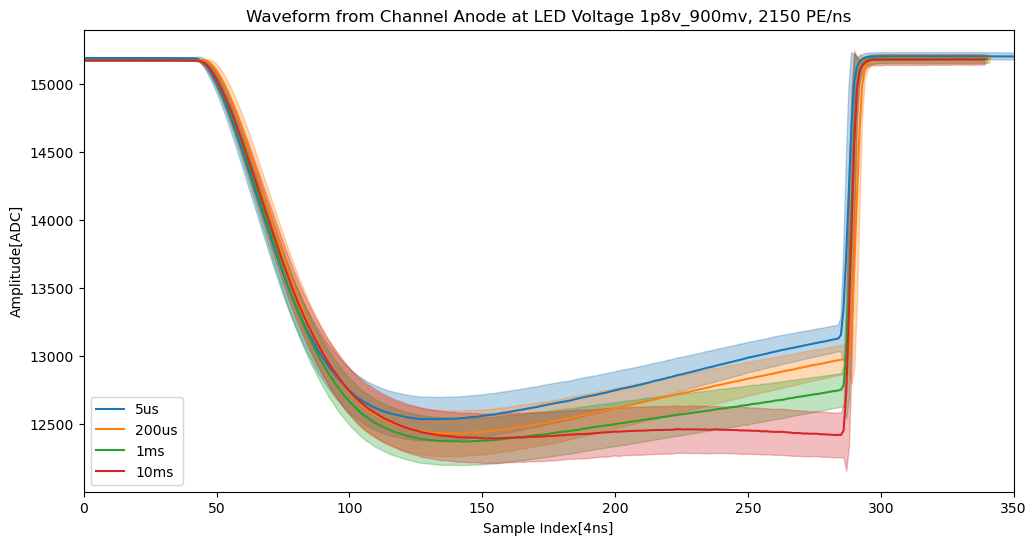

In [61]:
import matplotlib.pyplot as plt
from matplotlib import cm
cmap=cm.get_cmap('tab10')  

# def plot_multi_waveform(wf_dic, Channel, led_config):  
fig, ax = plt.subplots(figsize=(12, 6)) 
charge_map = {'1p6v_800mv': 900, '1p7v_850mv': 1500, '1p8v_900mv': 2150, '1p9v_950mv': 2800}
led_voltage = led_config.split('combine_')[1].split('_1p36v')[0]
title = r'Waveform from Channel {} at LED Voltage {}, {} PE/ns'.format(Channel, led_voltage, charge_map.get(led_voltage))  
save_path = r'./figs/{}_S2_{}_wf.png'.format(led_config,Channel) 
i = 0
for dt, data in wf_dic.items():
    plot_waveform(data['mean_wf'], data['std_wf'], i , dt)
    i += 1
ax.set_xlabel('Sample Index[4ns]')
ax.set_ylabel('Amplitude[ADC]')   
ax.set_title(title)
ax.set_xlim(0,350)
plt.legend(loc='lower left')    
print(save_path)
plt.savefig(save_path,dpi=300)
plt.show()

In [62]:
file_list = 'runlist/npylist_1p8'
Channel = 'Dynode'
wf_dic, led_config = calculate_wf_data_array(file_list, Channel=Channel)

outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p8v_900mv_1p36v_680mv_5us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p8v_900mv_1p36v_680mv_200us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p8v_900mv_1p36v_680mv_1ms_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p8v_900mv_1p36v_680mv_10ms_50hz_run0_*.h5py
20241126_12DB_LED_combine_1p8v_900mv_1p36v_680mv_


/tmp/ipykernel_1809960/3472022920.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')


./figs/20241126_12DB_LED_combine_1p8v_900mv_1p36v_680mv__S2_Dynode_wf.png


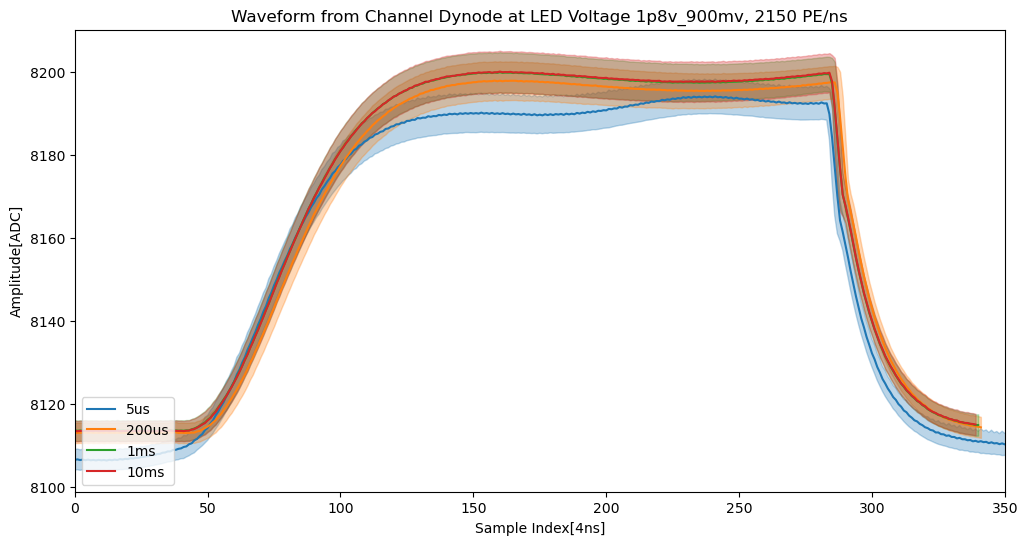

In [63]:
import matplotlib.pyplot as plt
from matplotlib import cm
cmap=cm.get_cmap('tab10')  

# def plot_multi_waveform(wf_dic, Channel, led_config):  
fig, ax = plt.subplots(figsize=(12, 6)) 
charge_map = {'1p6v_800mv': 900, '1p7v_850mv': 1500, '1p8v_900mv': 2150, '1p9v_950mv': 2800}
led_voltage = led_config.split('combine_')[1].split('_1p36v')[0]
title = r'Waveform from Channel {} at LED Voltage {}, {} PE/ns'.format(Channel, led_voltage, charge_map.get(led_voltage))  
save_path = r'./figs/{}_S2_{}_wf.png'.format(led_config,Channel) 
i = 0
for dt, data in wf_dic.items():
    plot_waveform(data['mean_wf'], data['std_wf'], i , dt)
    i += 1
ax.set_xlabel('Sample Index[4ns]')
ax.set_ylabel('Amplitude[ADC]')   
ax.set_title(title)
ax.set_xlim(0,350)
plt.legend(loc='lower left')    
print(save_path)
plt.savefig(save_path,dpi=300)
plt.show()

outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p7v_850mv_1p36v_680mv_5us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p7v_850mv_1p36v_680mv_200us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p7v_850mv_1p36v_680mv_1ms_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p7v_850mv_1p36v_680mv_10ms_50hz_run0_*.h5py
20241126_12DB_LED_combine_1p7v_850mv_1p36v_680mv_
./figs/20241126_12DB_LED_combine_1p7v_850mv_1p36v_680mv__S2_wf_Anode.png


/tmp/ipykernel_413052/453033166.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')


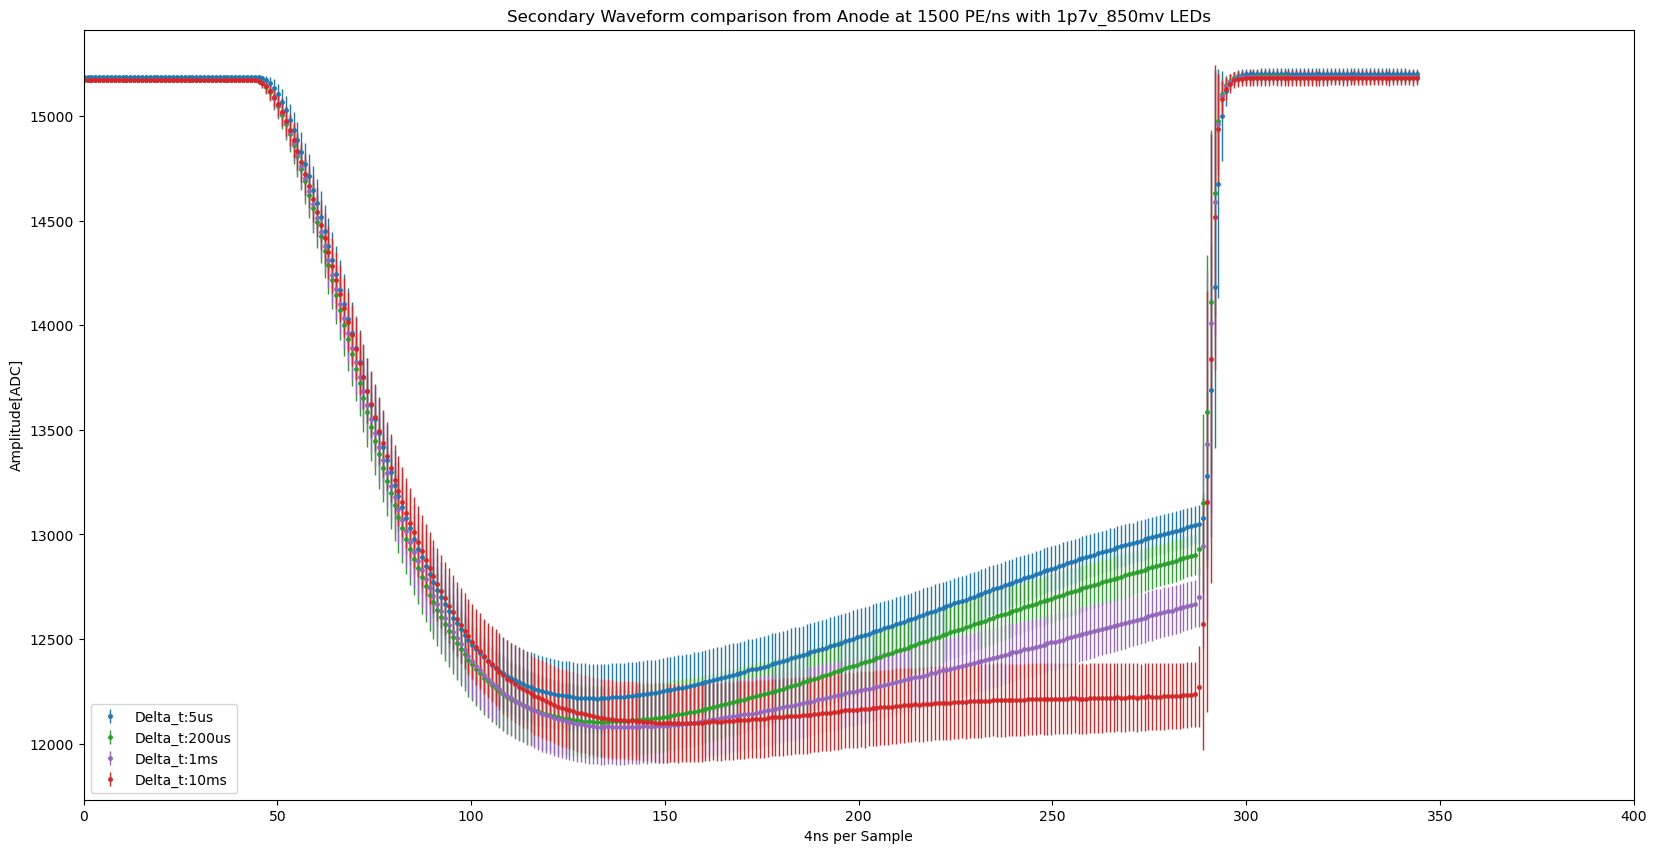

In [29]:
file_list = 'runlist/npylist_1p7'
Channel = 'Anode'
mea_5us, std_5us, mea_200us, std_200us, mea_1ms, std_1ms, mea_10ms, std_10ms, led_config = calculate_wf_data_array(file_list, Channel=Channel)
Plot_Waveform(mea_5us, std_5us, mea_200us, std_200us, mea_1ms, std_1ms, mea_10ms, std_10ms, led_config , Channel)

outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p7v_850mv_1p36v_680mv_5us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p7v_850mv_1p36v_680mv_200us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p7v_850mv_1p36v_680mv_1ms_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p7v_850mv_1p36v_680mv_10ms_50hz_run0_*.h5py
20241126_12DB_LED_combine_1p7v_850mv_1p36v_680mv_
./figs/20241126_12DB_LED_combine_1p7v_850mv_1p36v_680mv__S2_wf_Dynode.png


/tmp/ipykernel_413052/453033166.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')


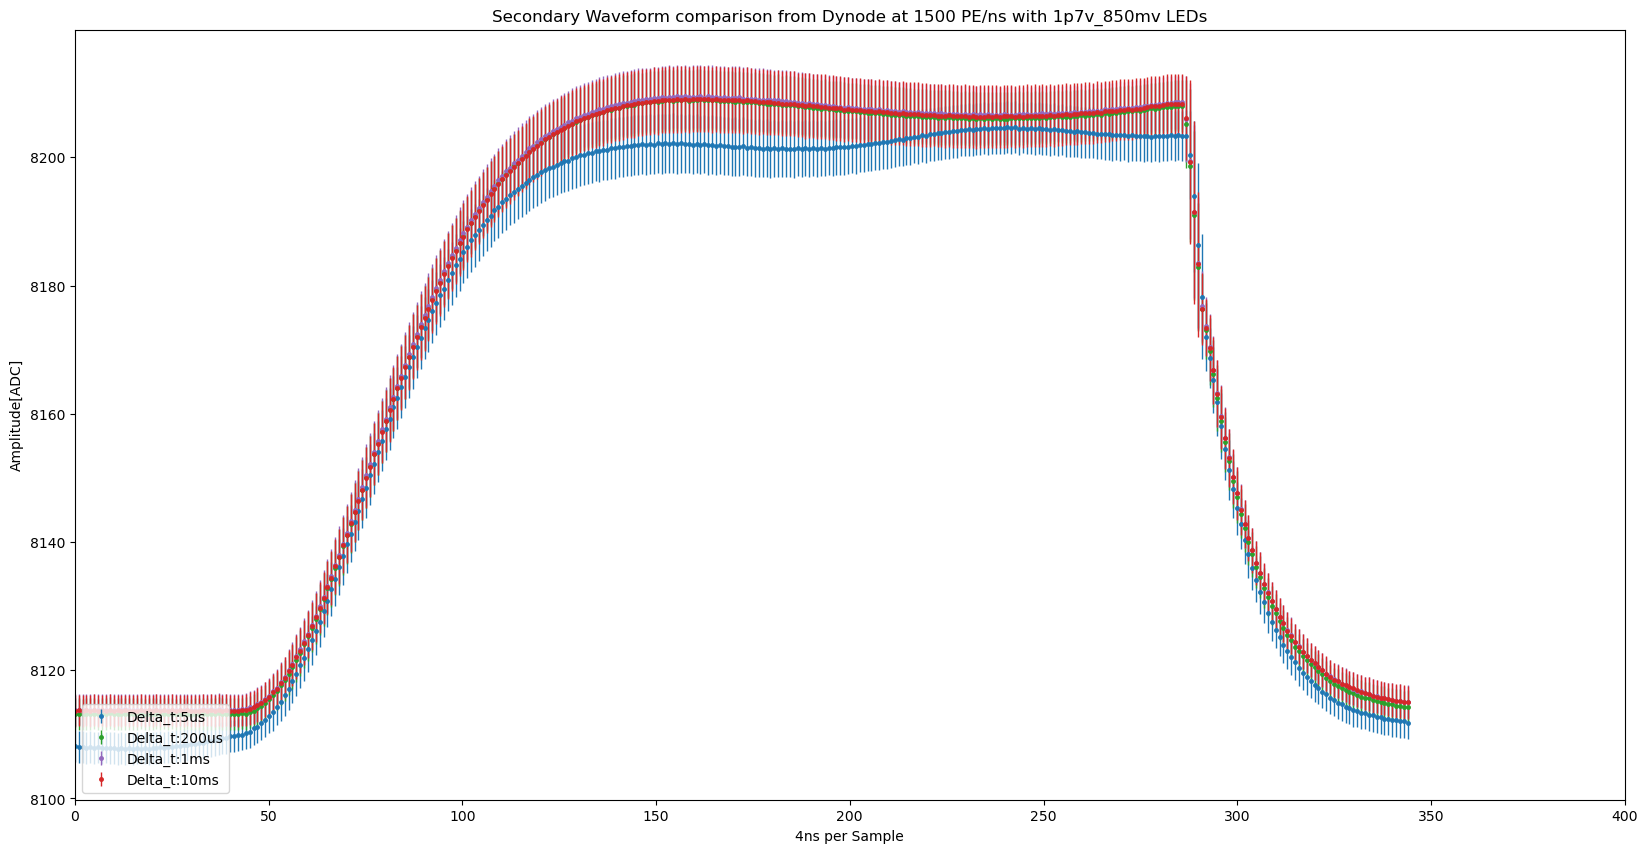

In [30]:
file_list = 'runlist/npylist_1p7'
Channel = 'Dynode'
mea_5us, std_5us, mea_200us, std_200us, mea_1ms, std_1ms, mea_10ms, std_10ms, led_config = calculate_wf_data_array(file_list, Channel=Channel)
Plot_Waveform(mea_5us, std_5us, mea_200us, std_200us, mea_1ms, std_1ms, mea_10ms, std_10ms, led_config , Channel)

outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_5us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_200us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_1ms_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_10ms_50hz_run0_*.h5py
20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_
./figs/20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv__S2_wf_Anode.png


/tmp/ipykernel_413052/453033166.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')


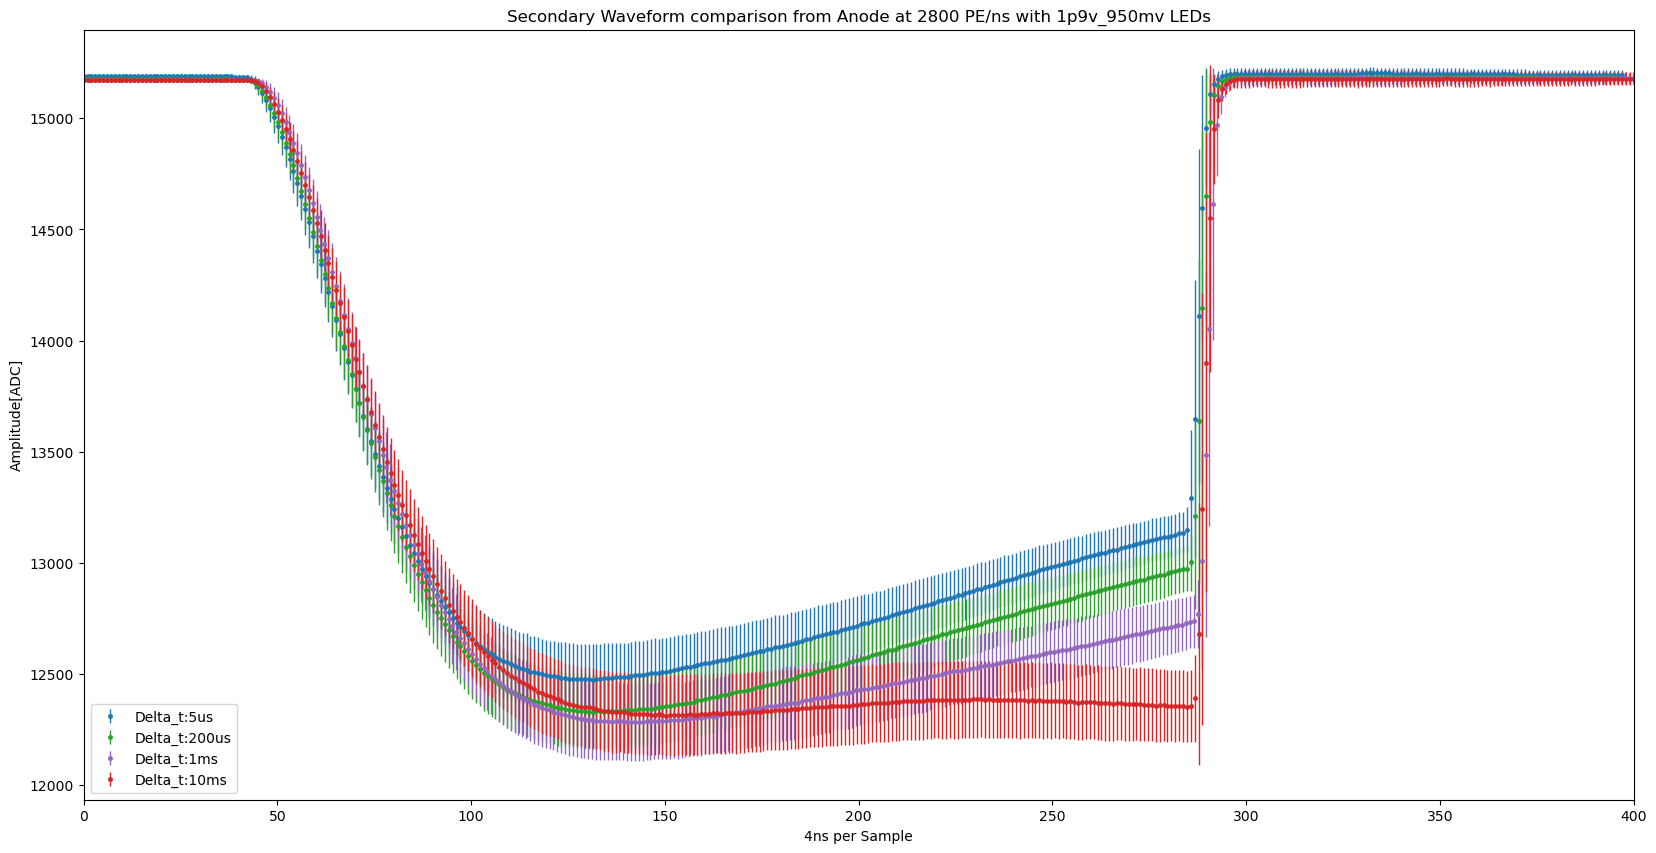

In [31]:
file_list = 'runlist/npylist_1p9'
Channel = 'Anode'
mea_5us, std_5us, mea_200us, std_200us, mea_1ms, std_1ms, mea_10ms, std_10ms, led_config = calculate_wf_data_array(file_list, Channel=Channel)
Plot_Waveform(mea_5us, std_5us, mea_200us, std_200us, mea_1ms, std_1ms, mea_10ms, std_10ms, led_config , Channel)


outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_5us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_200us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_1ms_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_10ms_50hz_run0_*.h5py
20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_
./figs/20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv__S2_wf_Dynode.png


/tmp/ipykernel_413052/453033166.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')


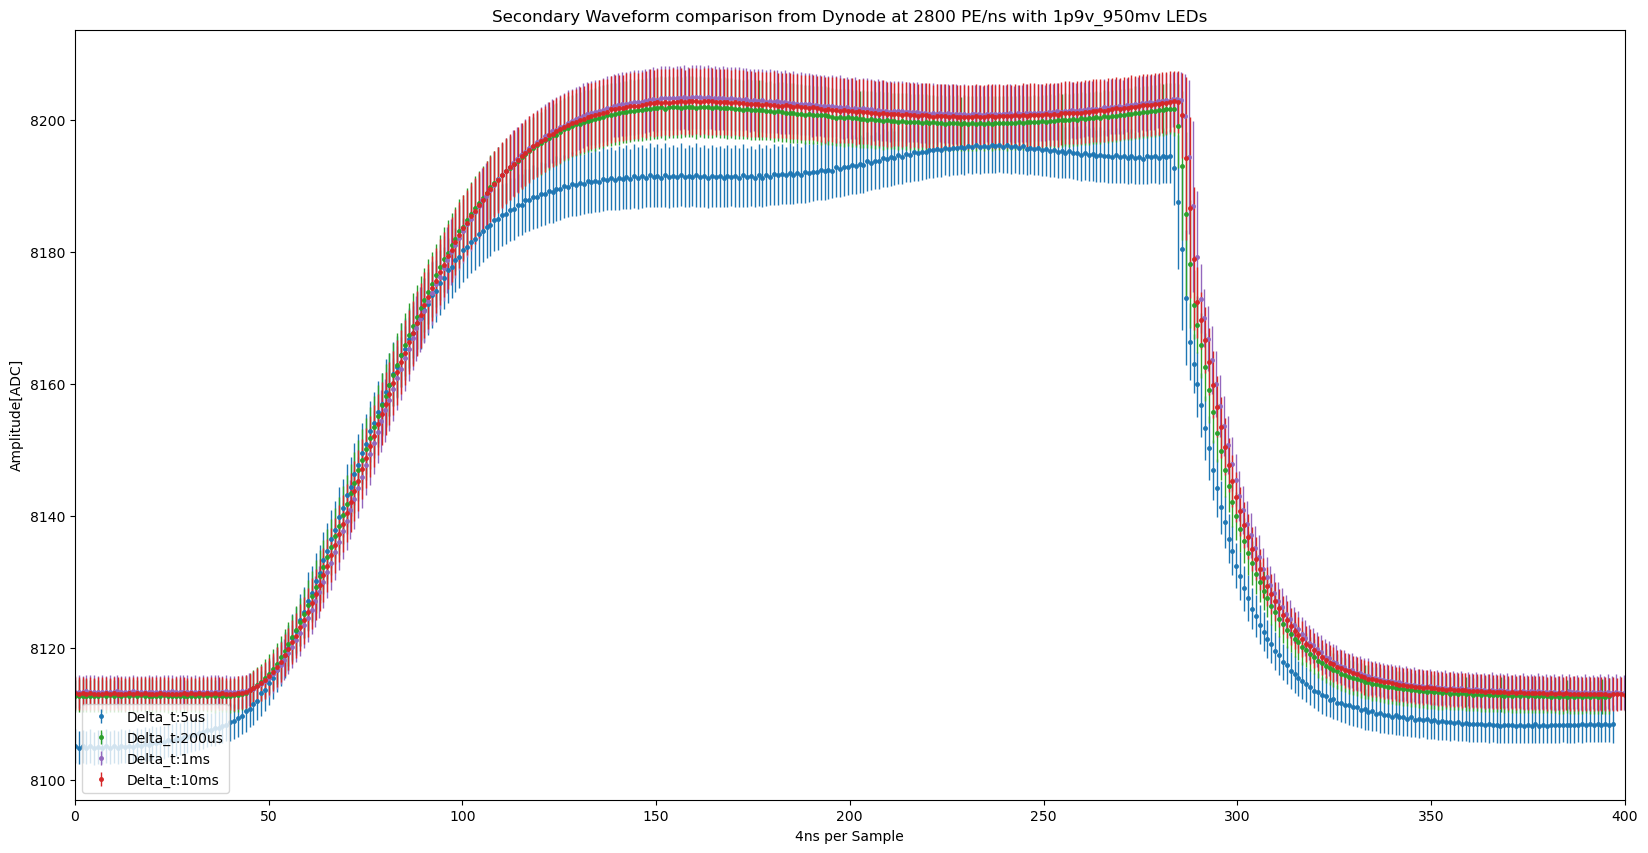

In [32]:
file_list = 'runlist/npylist_1p9'
Channel = 'Dynode'
mea_5us, std_5us, mea_200us, std_200us, mea_1ms, std_1ms, mea_10ms, std_10ms, led_config = calculate_wf_data_array(file_list, Channel=Channel)
Plot_Waveform(mea_5us, std_5us, mea_200us, std_200us, mea_1ms, std_1ms, mea_10ms, std_10ms, led_config , Channel)

outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv_5us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv_200us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv_1ms_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv_10ms_50hz_run0_*.h5py
20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv_
./figs/20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv__S2_wf_Anode.png


/tmp/ipykernel_466971/453033166.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')


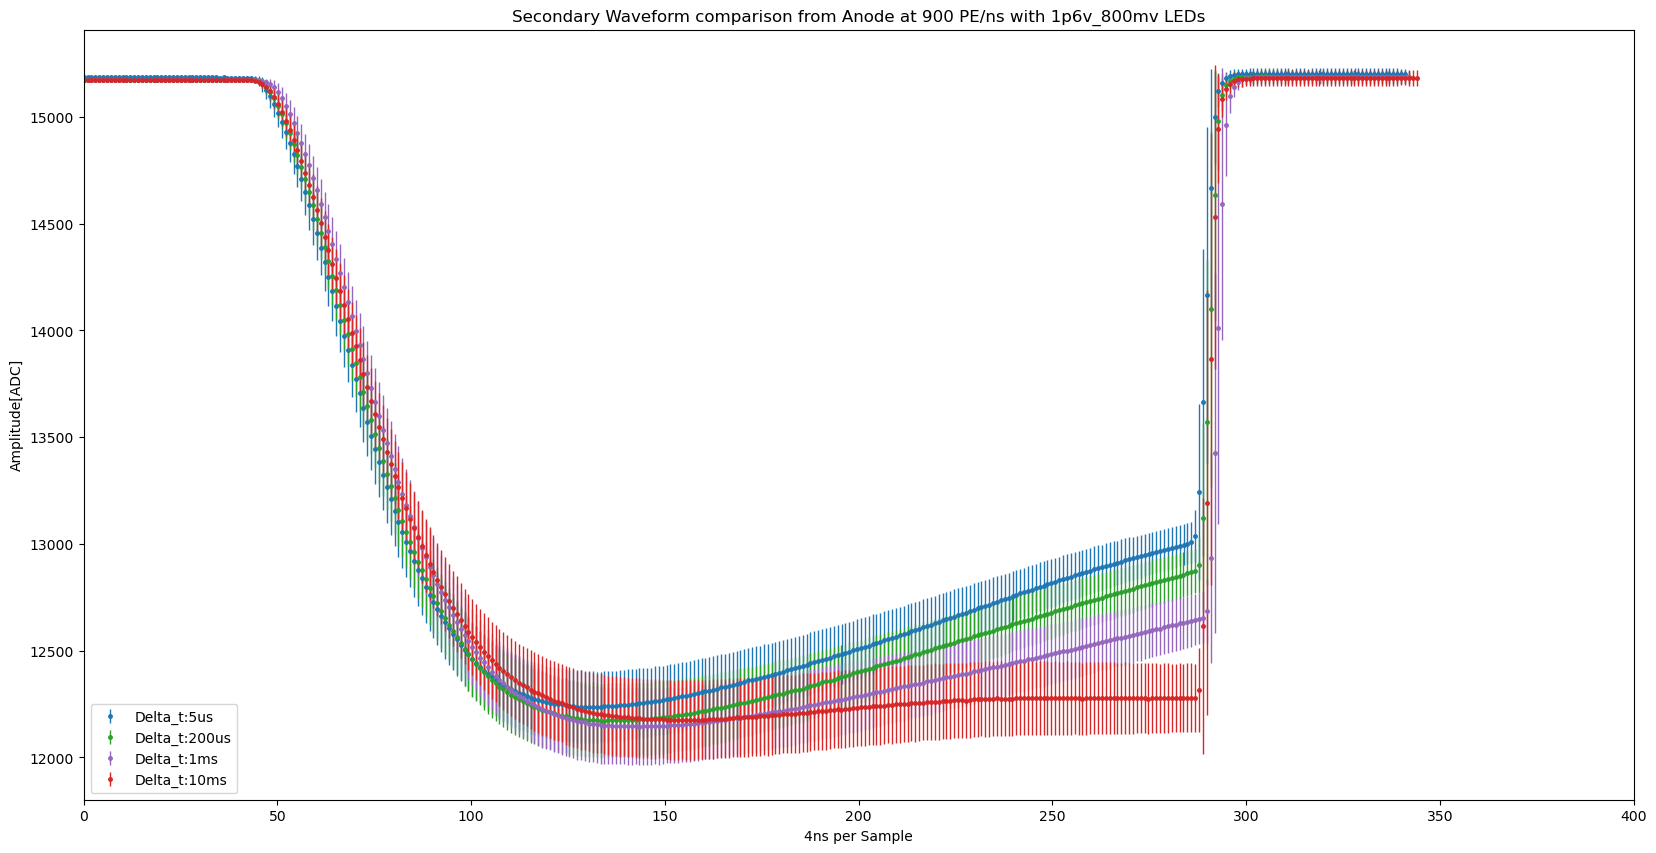

In [4]:
file_list = 'runlist/npylist_1p6'
Channel = 'Anode'
mea_5us, std_5us, mea_200us, std_200us, mea_1ms, std_1ms, mea_10ms, std_10ms, led_config = calculate_wf_data_array(file_list, Channel=Channel)
Plot_Waveform(mea_5us, std_5us, mea_200us, std_200us, mea_1ms, std_1ms, mea_10ms, std_10ms, led_config , Channel)

outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv_5us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv_200us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv_1ms_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv_10ms_50hz_run0_*.h5py
20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv_
./figs/20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv__S2_wf_Dynode.png


/tmp/ipykernel_466971/453033166.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')


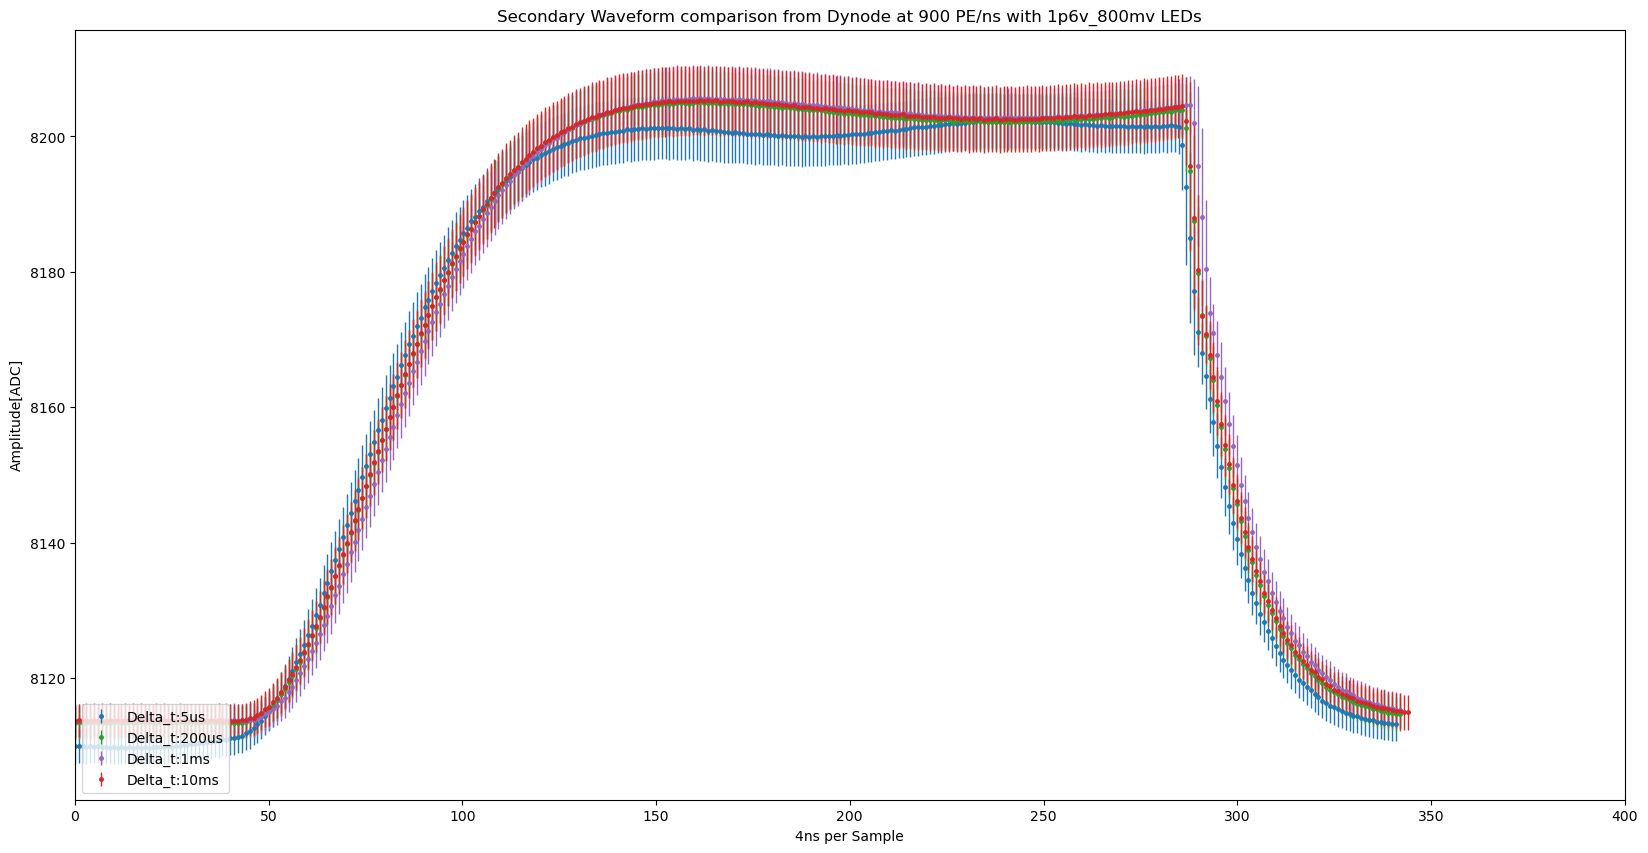

In [5]:
file_list = 'runlist/npylist_1p6'
Channel = 'Dynode'
mea_5us, std_5us, mea_200us, std_200us, mea_1ms, std_1ms, mea_10ms, std_10ms, led_config = calculate_wf_data_array(file_list, Channel=Channel)
Plot_Waveform(mea_5us, std_5us, mea_200us, std_200us, mea_1ms, std_1ms, mea_10ms, std_10ms, led_config , Channel)